<a href="https://colab.research.google.com/github/capitallatera/Project_1/blob/master/Mimic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from IPython.display import display, HTML # used to print out pretty pandas dataframes
import matplotlib.dates as dates
import matplotlib.lines as mlines

%matplotlib inline
plt.style.use('ggplot') 

# specify user/password/where the database is
sqluser = 'datascientist'
sqlpass = 'candidate'
port = '54321'
dbname = 'mimic'
schema_name = 'mimiciii'
host = '3.7.155.14'

query_schema = 'SET search_path to ' + schema_name + ';'

# connect to the database
con = psycopg2.connect(dbname=dbname, user=sqluser, password=sqlpass, host=host)

In [106]:
pip install psycopg2-binary

In [107]:
# create a database connection
host="3.7.155.14"
port=5432
user = 'datascientist'
password="candidate"
dbname = 'mimic'
schema_name = 'mimiciii'

In [108]:
query = query_schema + """
select *
from admissions
"""
df = pd.read_sql_query(query,con)

In [109]:
df.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,None,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,None,CATHOLIC,MARRIED,WHITE,NaT,NaT,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaT,NaT,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,None,PROTESTANT QUAKER,SINGLE,WHITE,NaT,NaT,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [110]:
# count the total no of Admissions
df.shape

(58976, 19)

In [111]:
# What percentage of Admissions was under Emergency
(df[df.admission_type=="EMERGENCY"].shape[0]/df.shape[0])*100

71.33579761258817

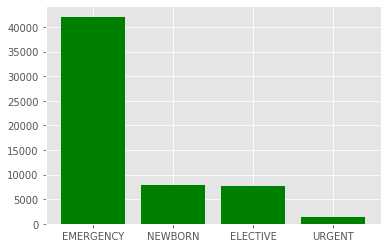

In [112]:
# Plot a graph of the count of various types of Admissions as a bar graph using python
import seaborn as sns
import matplotlib.pyplot as plt

df.admission_type.value_counts()
name=["EMERGENCY","NEWBORN","ELECTIVE","URGENT"]
value=list(df.admission_type.value_counts())

fig=plt.figure()
plt.bar(name,value,color='green')
plt.show()


In [113]:
query = query_schema + """
select *
from sofa
"""
df = pd.read_sql_query(query,con)

In [114]:
 columns=[ 'respiration','coagulation', 'liver', 'cardiovascular', 'cns', 'renal']
df_1=pd.DataFrame(df[columns])   # dataframe is created
df_1.fillna(0,inplace=True)


In [115]:
# Computed SOFA score
df_2=df_1.assign(score=lambda x:(x['respiration']+x['coagulation']+x['liver']+x['cardiovascular']+x['cns']+x['renal']))

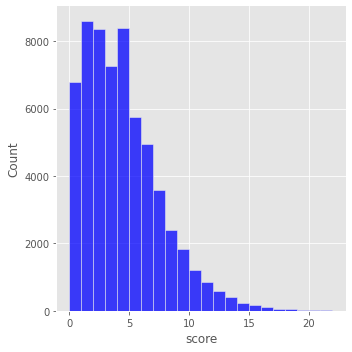

In [116]:
sns.displot(df_2,x="score",binwidth=1,color="blue")

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
df_2
fig = px.histogram(df_2, x="score")

fig.show()




In [119]:
df_2.to_csv("SOFA_score.csv")